<img src="logo_UCLA_blue_boxed.svg" alt="ucla logo" width="150" align="left"/>

### **MAE 103 - Elementary Fluid Mechanics**

<hr />

# Velocity profiles

In this notebook, we will discuss a useful way to visualize a flow in fluid mechanics: the **velocity profile**.

To start, let's consider one of the most basic types of flow: the linear shear flow, often called **Couette flow**. This type of flow is generated, for example, between two parallel walls when one wall is moving and the other is stationary. In the figure below, the top wall is moving with velocity $U$, the lower wall is stationary:

<img src="Couette.svg" alt="velocity profile" width="300" align="center"/>

Because of the **no-slip condition**, the fluid next to each wall moves with it. The fluid next to the upper wall moves at velocity $U$, the fluid next to the lower wall is at rest.

The velocity profile depicts $u(y)$, the horizontal component of velocity as a function of vertical position, $y$. This increases linearly from the lower to the upper wall. In fact, the function is just

$$u(y) = Uy/H$$

The arrows indicate the direction that the fluid is moving, and the lengths of the arrows indicate the relative speed at that $y$ position.

### Plotting velocity profiles

The arrows are helpful, but you can also plot a velocity profile without them. For example, consider the following velocity:

$$u(y) = \frac{4U_c}{H^2} y (H - y)$$

The coefficient $U_c$ is a speed, and $H$ is the gap height.

Let's define a function that evaluates this velocity. Here, `y`, `Uc`, and `H` are to be given as arguments to the function.

In [1]:
u(y,Uc,H) = 4*Uc/H^2*y*(H-y) 

u (generic function with 1 method)

Suppose the gap height $H$ is 1 cm and the speed $U_c$ is 1 m/s. We will evaluate this velocity at a range of locations between 0 and $H$:

In [2]:
H = 0.01  # 1 cm = 0.01 m
Uc = 1.0
y = range(0,H,length=101) # 101 points to evaluate at, just to make it look smooth.

0.0:0.0001:0.01

Now we evaluate the velocity function at the range of $y$ locations. (Remember that the `.` vectorizes the evaluation of a function.)

In [3]:
u.(y,Uc,H)

101-element Array{Float64,1}:
 0.0                
 0.0396             
 0.0784             
 0.11639999999999999
 0.15360000000000001
 0.19               
 0.22559999999999997
 0.2604             
 0.2944             
 0.3276             
 0.36000000000000004
 0.3916             
 0.42239999999999994
 ⋮                  
 0.3916000000000001 
 0.3600000000000003 
 0.3275999999999999 
 0.2944000000000001 
 0.2604000000000003 
 0.22559999999999994
 0.19000000000000017
 0.15360000000000038
 0.11639999999999998
 0.0784000000000002 
 0.03959999999999977
 0.0                

Notice that $u$ is 0 at the beginning and end of the range. Let's plot it. But let's plot it as a velocity profile, which means we make $u$ the 'x' axis and $y$ the 'y' axis.

In [6]:
using Plots

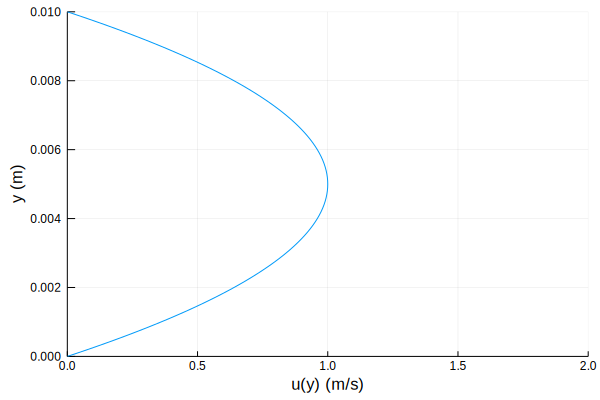

In [10]:
ps = plot(u.(y,Uc,H),y,xlim=(0,2Uc),ylim=(0,H),
    legend=false,xlabel="u(y) (m/s)",ylabel="y (m)")

The top and bottom of this plot suggest that these are stationary walls where the flow is at rest. In fact, this is the velocity profile associated with pressure-driven flow through the gap.

#### Dimensionless plots
We should get in the habit of making our plots "dimensionless". This has many benefits, including ensuring that the results are not dependent on the specific gap size and speed.

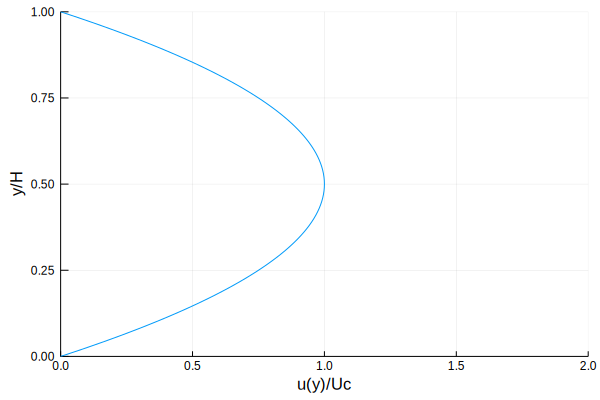

In [16]:
ps = plot(u.(y,Uc,H)/Uc,y/H,xlim=(0,2),ylim=(0,1),
    legend=false,xlabel="u(y)/Uc",ylabel="y/H",yticks=0:0.25:1)

Now we can read off the velocity as a fraction of the maximum (centerline) speed, and the position as a fraction of the gap height. There are no units on this plot, so it is irrelevant what system of units was used in the first place. (Notice that we also made sure that the centerline has its own tick mark, to make it easier to locate it.)

### Shear stress
We can calculate the viscous shear stress at any location with the equation

$$\tau = \mu \frac{\mathrm{d}u}{\mathrm{d}y}$$

In fact, in Couette flow, shear stress is the same everywhere:

$$\tau = \mu U/H$$

This represents, e.g., the resistive force (per unit area) that the fluid applies (to the left) on the upper wall while the wall moves to the right.

It also represents the force per unit area that the lower wall must withstand in order to remain stationary. The fluid is trying to drag the lower wall to the right, so this must be balanced by some reaction force in the wall to the left.

The **rate of work** (per unit area) required to move the upper wall is $\dot{W} = \tau U$. This would be measured in units of, e.g., $W/m^2$.

#### Viscometry
We can use the relationship between the velocity and shear stress for many practical tasks. In particular, it can be used to measure the viscosity of a given fluid, in a device called a **viscometer**. This device consists of a rotating inner cylinder of radius $R$ with prescribed angular velocity $\Omega$ and a stationary outer wall, and a fluid with unknown viscosity, $\mu$, in the gap of size $H$ between them.

<img src="Viscometer.svg" alt="velocity profile" width="300" align="center"/>

The basic idea of a viscometer is that one knows the angular velocity $\Omega$ and measures the *torque*, $T$, required to rotate it. This torque is directly attributable to the viscous shear stress acting on the inner cylinder.

Even though this is an annular region and not a straight gap like in the basic Couette flow, the curvature does not matter here because the gap $H$ is very small compared to the radius $R$.

Comparing this gap flow with the Couette flow above, the wall velocity here is $U = \Omega R$, so the wall shear stress applied on the inner cylinder is

$$\tau = \mu \Omega R/H$$

How do we relate this to the measured torque? Torque is the force applied on the wall times the distance to the center, $R$. The shear stress is uniformly applied on the inner cylinder, so the force applied by the fluid is the shear stress times the surface area,

$$T = \tau (2\pi R L) R$$

The term in parentheses is the surface area of the inner cylinder, where $L$ is its length (into the page).

Thus, putting all of this together:

$$ T = 2\pi L\mu \Omega R^3/H$$

#### A viscometer example

Let's suppose that we take measurements of a viscometer with the following characteristics: inner radius $R = 6$ cm, gap height $H = 0.125$ cm, and length $L = 13$ cm.

In [29]:
# converting everything to SI
R = 0.06
H = 0.00125
L = 0.13;

We run the viscometer at 6 different speeds and measure the required torque in each case. Here is the data we measured:

In [32]:
# angular velocity in rad/s
Ω = [0.0,1.0,2.0,3.0,4.0,5.0,6.0]

# torque in N.m
T = [0.0,0.181,0.36,0.54,0.72,0.899,1.086];

Note that, since we expect 0 torque at 0 speed, we have included that point in our data.

Let's plot the data to see the trend qualitatively:

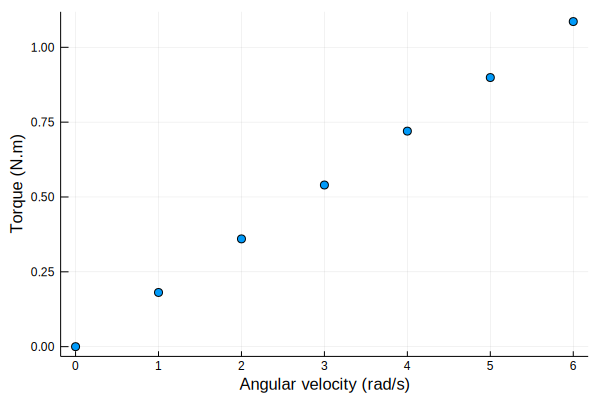

In [33]:
scatter(Ω,T,legend=false,xlabel="Angular velocity (rad/s)",ylabel="Torque (N.m)")

It looks quite linear! Let's fit a line through the data. We will use the `CurveFit` package for this:

In [34]:
using CurveFit

The `linear_fit` function suits our needs:

In [35]:
?linear_fit

search: linear_fit nonlinear_fit linear_king_fit linear_rational_fit



Fits a straight line through a set of points, `y = a₁ + a₂ * x`


In [36]:
p = linear_fit(Ω,T)

2-element Array{Float64,1}:
 -0.0006428571428567322
  0.18049999999999986  

We'll ignore the first coefficient, because we don't expect a y intercept in our straight line. The second coefficient, $p[2]$, is the slope:

$$T = p[2]\Omega$$

Compare this with the formula above relating torque to angular velocity, $T = 2\pi L\mu \Omega R^3/H$. We clearly must expect that

$$\mu = p[2]H/(2\pi L R^3)$$

In [37]:
μ = p[2]*H/(2π*L*R^3)

1.2788224371477515

Since we've put all units in SI, this value of viscosity must be in kg/(m.s). It's quite viscous! Only slightly smaller viscosity than glycerin.